In [6]:
# read the tsv file
import json 
import re 

regexstr = r"\/\/Sent \d{1,2}:"

file_name = "/Users/daniel/ideaProjects/allennlp/ipython/multirc/multirc-Question_phenomenta_annotations-General_phenomena.tsv"
paragraphs = []
qas = []
counter = 1
latest_paragraph = ""

info_map = {}

with open(file_name) as f:
    content = f.read().splitlines()
    for line in content: 
        counter = counter + 1
        splitted = line.split("\t")
        if len(splitted) > 3: 
            p_text = splitted[0].strip()
            q_text = splitted[1].strip()
            ans_text = [x.strip() for x in splitted[2].split("//")]
            correct_or_not = splitted[3].split(",")
            phenomenon_labels = [x.strip() for x in splitted[4].split(",")]
            
            assert len(ans_text) == len(correct_or_not), f"{ans_text} - {correct_or_not}"
            
            if len(p_text.strip()) > 10: 
                paragraphs.append({"context": latest_paragraph, "qas": qas})
                latest_paragraph = re.sub(regexstr, "", p_text).strip()
                qas = []
            elif len(q_text) > 3: 
                ans = [{"answer_start": 0, "text": latest_paragraph.split(" ")[0]}]
                # ans = [{"answer_start": 0, "text": x} for x in ans_text]
                question = {"answers": ans, "question": q_text, "id": str(counter)}
                qas.append(question)
                info_map[q_text] = (ans_text, correct_or_not, phenomenon_labels)
                    
    data = {"data": [{"paragraphs": paragraphs}]}
    
    # save data on disk 
    with open('/Users/daniel/ideaProjects/allennlp/QA_datasets/mutlirc_questions.json', 'w', newline='') as f:
        f.write(json.dumps(data))

In [7]:
def load_questions(activation_f, question_f, max_size = -1):
    activations_file = "/Users/daniel/ideaProjects/allennlp/" + activation_f
    questions_file = "/Users/daniel/ideaProjects/allennlp/" + question_f
    features = []
    pred_ans = []
    with open(activations_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
            if (max_size > -1 and len(pred_ans) > max_size):
                break

            if i % 2 == 0:
                # print(l)
                data = json.loads(l)
                features.append(data)
            else:
                pred_ans.append(l)

    questions = []
    labels = []
    with open(questions_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
            if i % 3 == 0:
                questions.append({})
                questions[int(i / 3)]["q"] = l
            elif i % 3 == 1:
                questions[int(i / 3)]["p"] = l
            elif i % 3 == 2:
                ans = json.loads(l)
                questions[int(i / 3)]["a"] = [c['text'] for c in ans]
                labels.append(ans[0]['text'])

            if (max_size > -1 and len(labels) > max_size):
                break
    mat = numpy.array(features)

    return (mat, labels, questions, pred_ans)

In [8]:
import json
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# (mat, labels, questions, pred_ans) = load_questions("ipython/babi/out3.txt", "ipython/babi/out22.txt", max_size=0)
(mat_ad, labels_ad, questions_ad, pred_ans_ad) = load_questions("ipython/multirc/out33-ner-test.txt", "ipython/multirc/out22-ner-test.txt", max_size=-1)

# read the questions and remember question ids:
# question_paragraph_id_map = {}
# ff = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mutlirc_questions.json"
# with open(ff) as file:
#     dataset_json = json.load(file)
#     dataset = dataset_json['data']
#     for article in dataset:
#         for paragraph in article['paragraphs']:
#             for qa in paragraph['qas']:
#                 key = qa['question'] + paragraph['context']
#                 id = qa['id']
#                 print(id)
#                 question_paragraph_id_map[key] = id
# bibi_reasoning_types = [question_paragraph_id_map[x["q"]+x["p"]] for x in questions_ad]

multirc_reasoning_types = [info_map[x["q"]][2] for x in questions_ad]

multirc_reasoning_types, pred_ans_ad, questions_ad

([['Coref', 'Lex', 'Common'],
  ['Coref', 'Lex', 'Common'],
  ['Coref', 'Common'],
  ['Coref', 'Lex', 'Common'],
  ['Coref', 'Lex', 'Common'],
  ['Coref'],
  ['Coref'],
  ['Coref'],
  ['Coref', 'Other'],
  ['Lex', 'Coref', 'Sp-temp'],
  ['Common'],
  ['Coref', 'Lex', 'Common', 'Sp-temp'],
  ['Sp-temp', 'Coref'],
  ['Coref'],
  ['Coref', 'Lex'],
  ['Coref'],
  ['Coref', 'Lex'],
  ['Coref', 'Lex', 'Sp-temp'],
  ['Sp-temp', 'Lex'],
  ['Common', 'Lex'],
  ['Coref', 'Math', 'Lex'],
  ['Coref', 'Lex'],
  ['Sp-temp', 'Lex'],
  ['Sp-temp', 'Lex', 'Common', 'Coref'],
  ['Sp-temp', 'Coref', 'Lex'],
  ['Sp-temp', 'Lex', 'Common'],
  ['Coref', 'Common'],
  ['Coref', 'Lex'],
  ['Common', 'Sp-temp', 'Lex'],
  ['List', 'Coref', 'Lex'],
  ['Lex', 'Common', 'Math'],
  ['Common', 'Lex'],
  ['Coref'],
  ['Lex', 'Common'],
  ['Lex', 'Common'],
  ['Coref', 'Sp-temp'],
  ['Coref', 'Sp-temp'],
  ['Sp-temp', 'Common', 'Coref', 'Lex'],
  ['Coref'],
  ['Coref'],
  ['Cause'],
  ['Coref'],
  ['Common', 'Lex'],
  

{'List', 'Lex', 'Coref', 'Sp-temp', 'Other', 'Math', 'Common', 'Cause'}
List -> 43.65079365079365 0
Lex -> 36.95434134383066 0
Coref -> 40.472457413967476 0
Sp-temp -> 38.46560846560847 0
Other -> 100.0 0
Math -> 13.96825396825397 0
Common -> 29.238100773906403 0
Cause -> 35.75757575757576 0


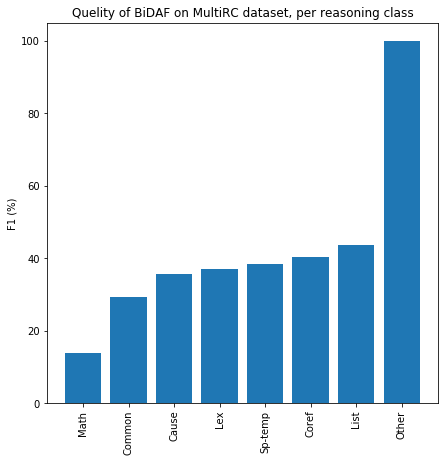

In [9]:
from evaluate11 import metric_max_over_ground_truths, f1_score, exact_match_score

# find the quality per reasoning type
scores = []
unique_types111 = set([y for x in multirc_reasoning_types for y in x])
print(unique_types111)

scores_zipped_labels= []
for t in unique_types111:
#     print(t)
    scores_ins = []
    # select questions which contain the reasoning type 
    for i, x  in enumerate(questions_ad): 
        question = x["q"]
        (ans_text, correct_or_not, phenomenon_labels) = info_map[question]
        if t in phenomenon_labels: # check if the target phenomena is included 
            correct_ans = [a for (a, c) in zip(ans_text,correct_or_not) if c == "1"]
            predicted_label = pred_ans_ad[i]
            max_f1 = max([f1_score(predicted_label,y) for y in correct_ans])
#             print(str(c) + " -> " + str(100.0 * max_f1))
            scores_ins.append(100.0 * max_f1)
    scores_zipped_labels.append((sum(scores_ins) / len(scores_ins), t))
    print(str(t) + " -> " + str(sum(scores_ins) / len(scores_ins)), len(scores))
# similarity = [f1_score(x,y) for x,y in zip(pred_ans, labels)]

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(7, 7))

# scores_zipped_labels = list(zip(scores,unique_types111))
scores_zipped_labels.sort(key=lambda x: x[0])
scores22, unique_types22 = zip(*scores_zipped_labels)

plt.bar(range(len(scores22)), scores22)
# ax.plot(range(len(scores)), scores, 'o')
ax.set_ylabel('F1 (%)')
ax.set_title('Quelity of BiDAF on MultiRC dataset, per reasoning class')
# ax.set_yticks(range(len(q_labels)))
# ax.set_xticks(range(len(bibi_reasoning_types)))
ax.set_xticks(np.arange(len(unique_types22)))

# ax.set_yticklabels(q_labels)
ax.set_xticklabels(unique_types22, rotation=90)
plt.show()

In [15]:
# mat_concat = np.concatenate((mat, mat_ad), axis=0)
# reasoning_types = ["squad"]*len(pred_ans) + bibi_reasoning_types
unique_reasoning_types = list(unique_types111) # list(set(bibi_reasoning_types))
# # unique_reasoning_types_indices = list(range(len(unique_reasoning_types)))
multirc_reasoning_type_indices = [unique_reasoning_types.index(x) for coll in multirc_reasoning_types for x in coll]
# labels_concat = np.concatenate((labels, labels_ad))
# pred_concat = np.concatenate((pred_ans, pred_ans_ad))

# multirc_reasoning_type_indices
# unique_reasoning_types.index(x) 

In [13]:
from sklearn.cluster import KMeans
db = KMeans(n_clusters=len(unique_reasoning_types), random_state=2).fit(mat_ad)
# db = DBSCAN(eps=0.3, min_samples=10).fit(mat_ad)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True

# labelsss = db.labels_
# repeat the labels, for each category 
labelsss = []
for i, l in enumerate(db.labels_): 
    for j in range(len(multirc_reasoning_types[i])): 
        labelsss.append(l)

len(unique_reasoning_types)

8

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import cluster, metrics

print(len(multirc_reasoning_type_indices))
print(len(labelsss))
matt1 = confusion_matrix(multirc_reasoning_type_indices, labelsss) 
max_values = np.max(matt1, axis=1)
max_indices = np.argmax(matt1, axis=1)
    

max_indices = list(enumerate(max_indices))
max_indices.sort(key=lambda x: x[1])
new_ordering = [x[0] for x in max_indices]

matt = matt1[new_ordering, :]

# matt1, max_values, max_indices, new_ordering, matt1[new_ordering, :]
# multirc_reasoning_types

138
138


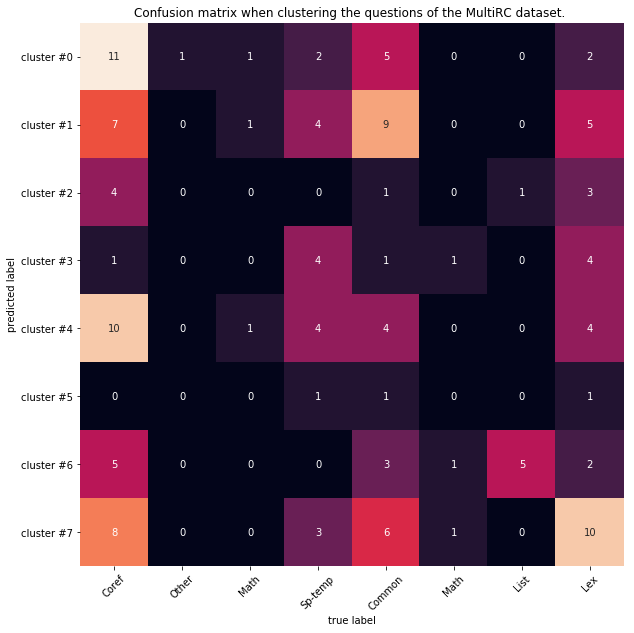

8
ars: 0.018324341235906243


In [22]:
plt.figure(figsize=(10, 10))
sss = sns.heatmap(matt.T, square=True,
            annot=True,
            fmt='d', cbar=False,
            xticklabels=True,
            yticklabels=True
            )

multirc_reasoning_types_flattened = [y for x in multirc_reasoning_types for y in x]
values, counts = np.unique(multirc_reasoning_types_flattened, return_counts=True)

# print(multirc_reasoning_types_flattened)

count_per_label = dict(zip(counts, values))

# print(count_per_label)

new_label_ordering = [count_per_label[c] for c in np.sum(matt, axis=1)]

y_labels = ['cluster #' + str(i) for i in range(len(unique_reasoning_types))]
sss.set_xticklabels(new_label_ordering, rotation=45)
sss.set_yticklabels(y_labels, rotation=0)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion matrix when clustering the questions of the MultiRC dataset. ')
plt.show()
print(len(unique_reasoning_types))

ars = metrics.adjusted_rand_score(labelsss, multirc_reasoning_type_indices)
print("ars: " + str(ars))
# unique_reasoning_types

In [56]:
# couts of the types  
values, counts = np.unique(multirc_reasoning_types, return_counts=True)

count_per_label = dict(zip(counts, values))

new_label_ordering = [count_per_label[c] for c in np.sum(matt, axis=1)]

values, counts,dict(zip(counts, values)), new_label_ordering

(array(['Cause', 'Cause,Sp-temp,Common,Coref', 'Common', 'Common,Cause',
        'Common,Lex', 'Common,Sp-temp,Lex', 'Coref', 'Coref, Common',
        'Coref,Common', 'Coref,Common,Lex', 'Coref,Common,List',
        'Coref,Lex', 'Coref,Lex,Common', 'Coref,Lex,Common,Sp-temp',
        'Coref,Lex,Sp-temp', 'Coref,List,Common', 'Coref,Math,Lex',
        'Coref,Math,List', 'Coref,Other', 'Coref,Sp-temp',
        'Coref,Sp-temp,Common', 'Coref,lex,common', 'Lex,Common',
        'Lex,Common,Math', 'Lex,Coref,Common', 'Lex,Coref,Sp-temp',
        'List,Common', 'List,Coref,Lex', 'Sp-temp',
        'Sp-temp,Common,Coref,Lex', 'Sp-temp,Coref', 'Sp-temp,Coref,Lex',
        'Sp-temp,Lex', 'Sp-temp,Lex,Common', 'Sp-temp,Lex,Common,Coref'],
       dtype='<U26'),
 array([ 1,  1,  2,  1,  3,  1, 13,  1,  3,  1,  1,  5,  2,  1,  1,  1,  1,
         1,  1,  2,  1,  2,  3,  1,  1,  1,  1,  2,  3,  1,  1,  1,  2,  1,
         1]),
 {1: 'Sp-temp,Lex,Common,Coref',
  2: 'Sp-temp,Lex',
  3: 'Sp-temp',
  13:

69 -> 0.0
42 -> 0.0
8 -> 0.0
26 -> 0.0
9 -> 0.0
17 -> 0.0
18 -> 0.0
85 -> 0.0
28 -> 0.0
23 -> 0.0
44 -> 0.0
56 -> 100.0
68 -> 0.0
83 -> 0.0
81 -> 0.0
87 -> 0.0
5 -> 0.0
65 -> 0.0
80 -> 0.0
20 -> 0.0
21 -> 0.0
19 -> 0.0
50 -> 0.0
77 -> 0.0
10 -> 0.0
46 -> 0.0
55 -> 0.0
14 -> 0.0
58 -> 0.0
84 -> 0.0
35 -> 0.0
76 -> 0.0
82 -> 0.0
72 -> 0.0
73 -> 0.0
6 -> 0.0
4 -> 0.0
57 -> 0.0
36 -> 0.0
88 -> 0.0
16 -> 0.0
7 -> 0.0
34 -> 0.0
45 -> 0.0
22 -> 0.0
62 -> 5.882352941176471
63 -> 0.0
86 -> 0.0
64 -> 100.0
75 -> 0.0
67 -> 0.0
11 -> 0.0
39 -> 0.0
59 -> 0.0
38 -> 0.0
43 -> 0.0
27 -> 0.0
33 -> 0.0
66 -> 0.0
49 -> 0.0
30 -> 0.0
37 -> 0.0
15 -> 0.0
29 -> 0.0
74 -> 0.0


IndexError: too many indices for array

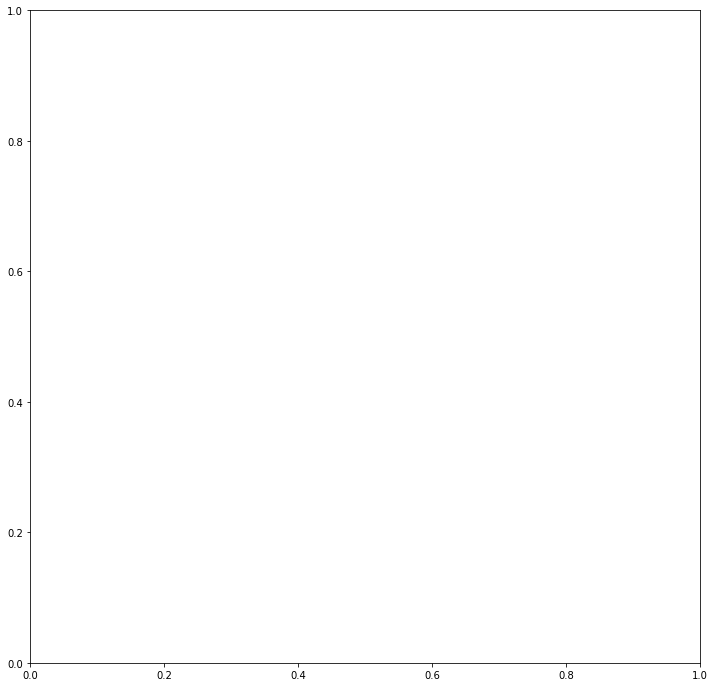

In [130]:
from evaluate11 import metric_max_over_ground_truths, f1_score, exact_match_score

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

(mat, labels, questions, pred_ans) = load_questions("ipython/babi/out3.txt", "ipython/babi/out22.txt", max_size=0)
(mat_ad, labels_ad, questions_ad, pred_ans_ad) = load_questions("ipython/multirc/out33-ner-test.txt", "ipython/multirc/out22-ner-test.txt", max_size=-1)

# read the questions and remember question ids:
question_paragraph_id_map = {}
ff = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mutlirc_questions.json"
with open(ff) as file:
    dataset_json = json.load(file)
    dataset = dataset_json['data']
    for article in dataset:
        for paragraph in article['paragraphs']:
            for qa in paragraph['qas']:
                key = qa['question'] + paragraph['context']
                id = qa['id']
                question_paragraph_id_map[key] = id

bibi_reasoning_types = [question_paragraph_id_map[x["q"]+x["p"]] for x in questions_ad]

# find the quality per reasoning type
for c in set(bibi_reasoning_types):
    predictions_a = np.array([pred_ans_ad[i] for i, r in enumerate(bibi_reasoning_types) if r == c])
    labels_a = np.array([labels_ad[i] for i, r in enumerate(bibi_reasoning_types) if r == c])
    similarity = [f1_score(x,y) for x,y in zip(predictions_a, labels_a)]
    assert len(predictions_a) == len(labels_a)
    print(str(c) + " -> " + str(100.0 * sum(similarity) / len(predictions_a)))

similarity = [f1_score(x,y) for x,y in zip(pred_ans, labels)]
# print("Squad -> ", str(100.0 * sum(similarity) / len(pred_ans)))


mat_concat = np.concatenate((mat, mat_ad), axis=0)
reasoning_types = ["squad"]*len(pred_ans) + bibi_reasoning_types
unique_reasoning_types = list(set(bibi_reasoning_types))
# unique_reasoning_types_indices = list(range(len(unique_reasoning_types)))
bibi_reasoning_type_indices = [unique_reasoning_types.index(x) for x in bibi_reasoning_types]
labels_concat = np.concatenate((labels, labels_ad))
pred_concat = np.concatenate((pred_ans, pred_ans_ad))

X_embedded = TSNE(n_components=2,init="pca").fit_transform(mat_concat)
fig, ax = plt.subplots(figsize=(12, 12))
for iter, c in enumerate(unique_reasoning_types):
    X_selected = np.asarray([X_embedded[i, :] for i, r in enumerate(reasoning_types) if r == c and f1_score(pred_concat[i], labels_concat[i]) > 0.6])
    plt.scatter(X_selected[:, 0], X_selected[:, 1], alpha=0.7, s=2, label=c) # color=color_map[iter],

ax.legend()
plt.show()